### 1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК.

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.



In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### 2. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков


In [72]:
def corr_df(df,title):
    print('Анализ. ',title)
    ax= df.plot(kind='scatter', x='hardness', y='mortality')
    ax.set_xlabel('Концентрация кальция')
    ax.set_ylabel('Смертность на 100000 населения')
    plt.show()
    coef_pirson=round(df[['hardness', 'mortality']].corr().iloc[0,1],2)
    coef_spearman=round(df[['hardness', 'mortality']].corr(method='spearman').iloc[0,1],2)
    print(f'    Коэффициент корреляции Пирсона ',coef_pirson)
    print(f'    Коэффициент корреляции Спирмена ',coef_spearman)

    X = df[['hardness']]
    y = df['mortality']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train) 
    # model.coef_
    # model.intercept_
    y_pred = model.predict(X_test)
    coef_determ=round(model.score(X_test, y_test),2)
    print(f'    Коэффициент детерминации',coef_determ)
    print(f'\nГрафик остатков:')
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, c='r')
    plt.show()
    return coef_pirson,coef_spearman, coef_determ

Анализ.  По всем данным


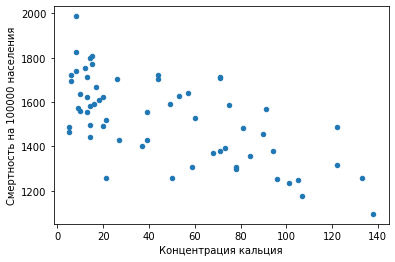

    Коэффициент корреляции Пирсона  -0.65
    Коэффициент корреляции Спирмена  -0.63
    Коэффициент детерминации 0.5

График остатков:


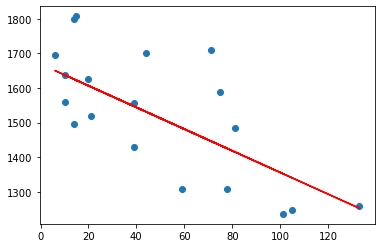

(-0.65, -0.63, 0.5)

In [73]:
df_water=pd.read_csv('water.csv')
df_water.head()
corr_df(df_water,"По всем данным")

### 3. Задание.
* Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

Анализ.  Для северных городов


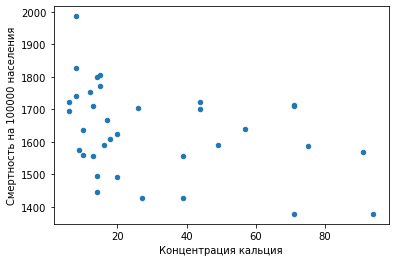

    Коэффициент корреляции Пирсона  -0.37
    Коэффициент корреляции Спирмена  -0.4
    Коэффициент детерминации 0.02

График остатков:


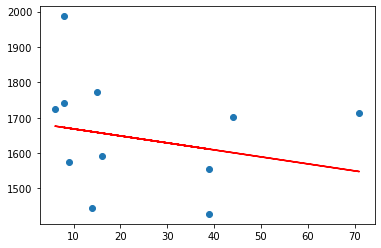

Анализ.  Для южных городов


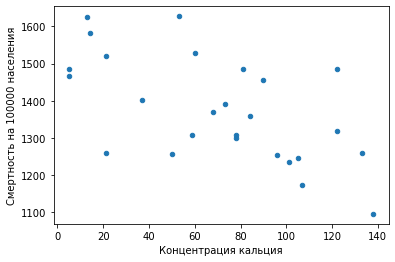

    Коэффициент корреляции Пирсона  -0.6
    Коэффициент корреляции Спирмена  -0.6
    Коэффициент детерминации -2.55

График остатков:


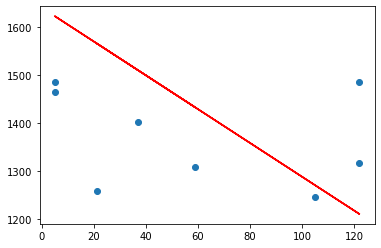

Вывод: по отдельности для южных и северных городов данная зависимость не соблюдается.


In [74]:
df_water_north=df_water.query('location=="North"')
corr_df(df_water_north,"Для северных городов")
df_water_south=df_water.query('location=="South"')
corr_df(df_water_south,"Для южных городов")
print(f'Вывод: по отдельности для южных и северных городов данная зависимость не соблюдается.')